<a href="https://colab.research.google.com/github/alchatman3/IDS/blob/main/HW5_Prb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Start rmagic to mix Python and R code sells

%load_ext rpy2.ipython

In [2]:
# Creating a dataframe with the file 
%%R

library(readr)
companyDF <- read_csv("https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv", show_col_types = FALSE)

In [3]:
# Display the first 10 rows
%%R

head(companyDF, 10)

# A tibble: 10 × 4
      TV Radio Newspaper Sales
   <dbl> <dbl>     <dbl> <dbl>
 1 230.   37.8      69.2  22.1
 2  44.5  39.3      45.1  10.4
 3  17.2  45.9      69.3  12  
 4 152.   41.3      58.5  16.5
 5 181.   10.8      58.4  17.9
 6   8.7  48.9      75     7.2
 7  57.5  32.8      23.5  11.8
 8 120.   19.6      11.6  13.2
 9   8.6   2.1       1     4.8
10 200.    2.6      21.2  15.6


In [4]:
# Summarize the dataframe
%%R

summary(companyDF)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  


In [5]:
# Compute the standard correlation coefficient (Pearson’s r) between pairs of attributes
# to determine which parameter has the greatest correlation with Sales
%%R

corr_matrix <- cor(companyDF[ , colnames(companyDF)], companyDF$Sales)
#corr_matrix
head(companyDF[order(corr_matrix, decreasing = TRUE), ])

# A tibble: 4 × 4
     TV Radio Newspaper Sales
  <dbl> <dbl>     <dbl> <dbl>
1 152.   41.3      58.5  16.5
2 230.   37.8      69.2  22.1
3  44.5  39.3      45.1  10.4
4  17.2  45.9      69.3  12  


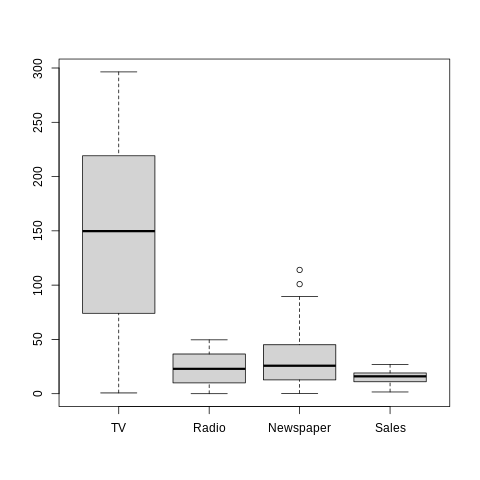

In [6]:
# Create a boxplot for each variable in the dataset
%%R

boxplot(companyDF)

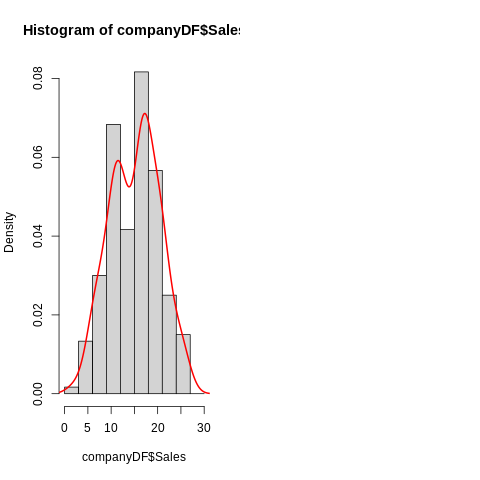

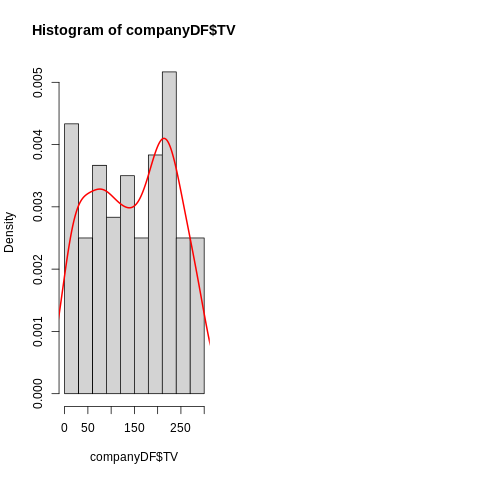

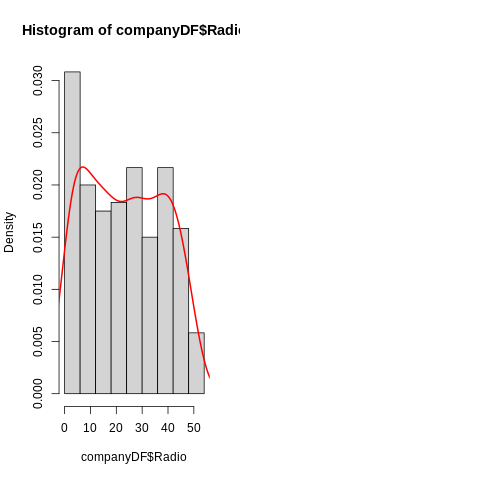

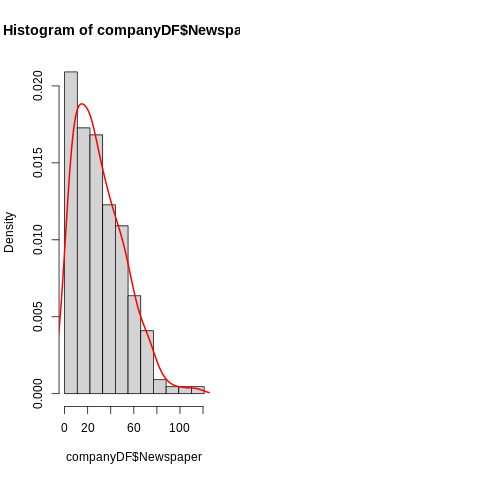

In [7]:
# Plotting histogram and kernel density estimates
%%R

par(mfrow = c(1,2))
# Plot the histogram
hist(companyDF$Sales, breaks = seq(from=0, to=30, by=3), freq = FALSE)
# Calculate the density
dx <- density(companyDF$Sales)
# Add the density to the histogram plot
lines(dx, lwd = 2, col = "red")

par(mfrow = c(1,2))
# Plot the histogram
hist(companyDF$TV, breaks = seq(from=0, to=300, by=30), freq = FALSE)
# Calculate the density
dx <- density(companyDF$TV)
# Add the density to the histogram plot
lines(dx, lwd = 2, col = "red")

par(mfrow = c(1,2))
# Plot the histogram
hist(companyDF$Radio, breaks = seq(from=0, to=55, by=6), freq = FALSE)
# Calculate the density
dx <- density(companyDF$Radio)
# Add the density to the histogram plot
lines(dx, lwd = 2, col = "red")

par(mfrow = c(1,2))
# Plot the histogram
hist(companyDF$Newspaper, breaks = seq(from=0, to=130, by=11), freq = FALSE)
# Calculate the density
dx <- density(companyDF$Newspaper)
# Add the density to the histogram plot
lines(dx, lwd = 2, col = "red")

In [21]:
%%R
# Checking for any missing values
sum(is.na(companyDF))

[1] 0


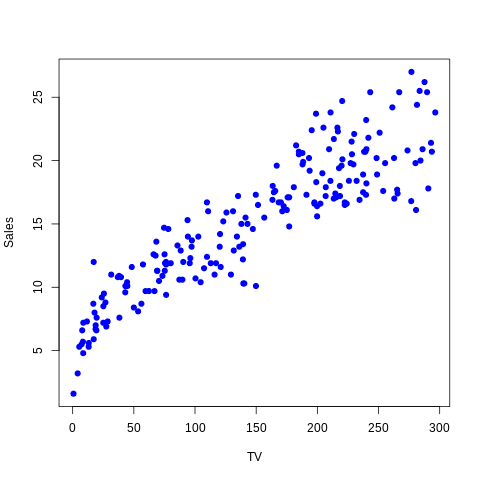

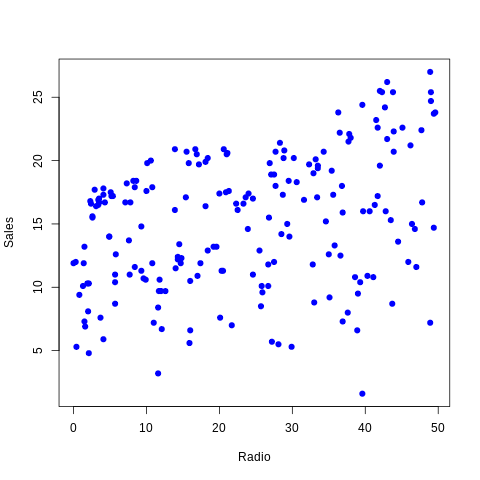

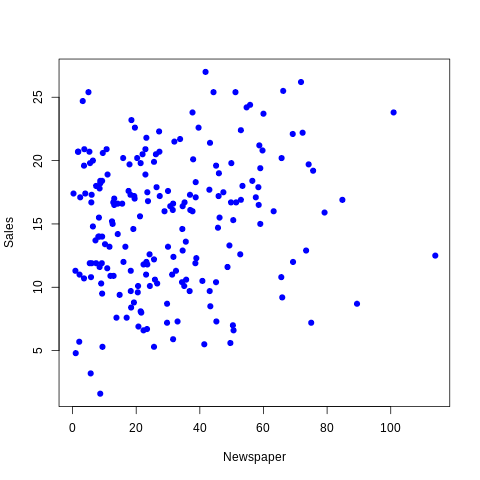

In [22]:
%%R
# Plotting linear regression plots for Sales with all other attributes
x1 <- companyDF$TV
x2 <- companyDF$Radio
x3 <- companyDF$Newspaper
y <- companyDF$Sales

plot(x1, y, col='blue', pch=19, xlab='TV', ylab='Sales')
plot(x2, y, col='blue', pch=19, xlab='Radio', ylab='Sales')
plot(x3, y, col='blue', pch=19, xlab='Newspaper', ylab='Sales')

In [23]:
%%R
# Calculating the intercept and slope for Sales and TV
fit <- lm (y~x1)
fit


Call:
lm(formula = y ~ x1)

Coefficients:
(Intercept)           x1  
    6.97482      0.05546  



In [24]:
%%R
# Calculating the R2 and MSE values for Sales and TV
lm <- lm(y ~ x1, companyDF)
mse <- mean(lm$residuals^2)

r.lm <- lm(y ~ x1, companyDF)
r2 <- summary(r.lm)$r.squared

message('R2: ', r2)
message('Mean squared error: ', mse)

R[write to console]: R2: 0.812175702998741

R[write to console]: Mean squared error: 5.21774389779513



In [25]:
%%R
# Splitting data into trining and test sets, 70% and 30%
dt = sort(sample(nrow(companyDF), nrow(companyDF)*.7))
train <- companyDF[dt,]
test <- companyDF[-dt,]

In [26]:
%%R
# Getting the shape of train set
dim(train)

[1] 140   4


In [27]:
%%R
# Getting the shape of test set
dim(test)

[1] 60  4


In [28]:
%%R
# Finding R2 and MSE values for Sales and Radio
lm <- lm(y ~ x2, companyDF)
mse <- mean(lm$residuals^2)

r.lm <- lm(y ~ x2, companyDF)
r2 <- summary(r.lm)$r.squared

message('R2: ', r2)
message('Mean squared error: ', mse)

R[write to console]: R2: 0.122241903994786

R[write to console]: Mean squared error: 24.3840494669376



In [29]:
%%R
# Finding R2 and MSE values for Sales and Newspaper
lm <- lm(y ~ x3, companyDF)
mse <- mean(lm$residuals^2)

r.lm <- lm(y ~ x3, companyDF)
r2 <- summary(r.lm)$r.squared

message('R2: ', r2)
message('Mean squared error: ', mse)

R[write to console]: R2: 0.024951369862865

R[write to console]: Mean squared error: 27.086772697557

